<a href="https://colab.research.google.com/github/SamuelTelesSilva/banheira/blob/main/dados_banheira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Metodologia

**CRISP-DM**

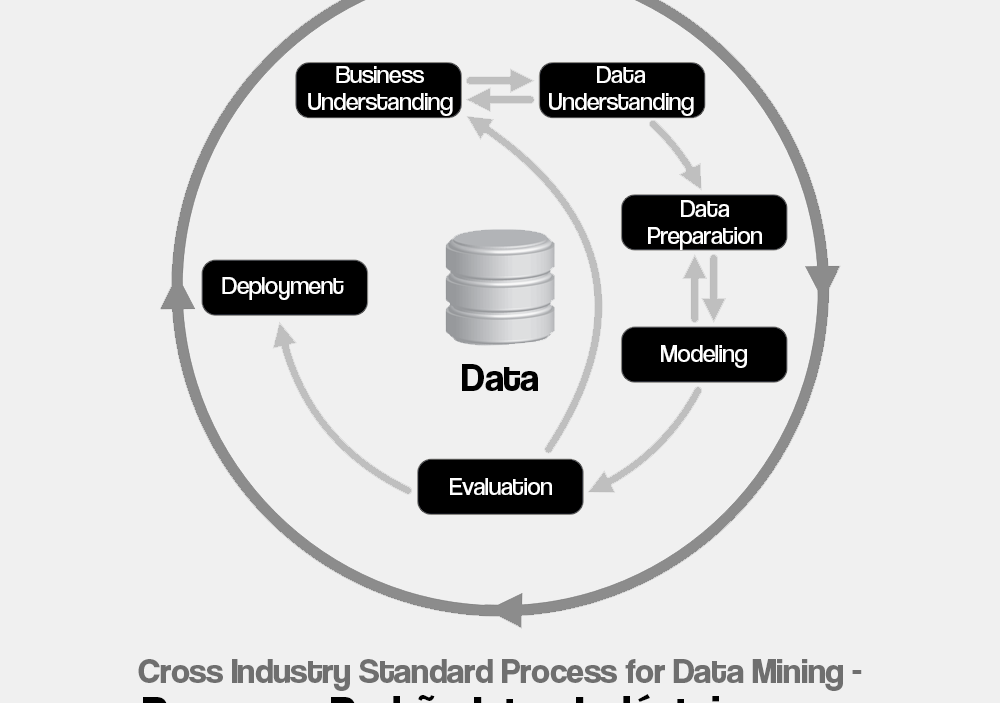

# Instalação

In [2]:
!pip install scikit-plot #Biblioteca para visualização de dados

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import matplotlib as mpl
from sklearn.tree import plot_tree
# Import label encoder 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#Normalizar o dataset
from sklearn.preprocessing import MinMaxScaler 
#Algoritmo de machine learning
from sklearn.ensemble import RandomForestClassifier
#Algoritmo de redes neurais
from sklearn.neural_network import MLPClassifier
# definindo a arquitetura das redes
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import Adam
#Metricas
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
#Estatística
import statistics as sts

# Business understanding - Entendimento do negócio


# Data understanding - Entendimento dos dados


Dataset:
- O dataset foi montado para trabalhar com machine learning e redes neurais, os valores do dataset não são verdadeiros.
- Os verdadeiros valores vem via JSON da banheira montada do artigo https://periodicos.univali.br/index.php/acotb/article/view/6990
- Link para baixar o dataset: 

    - usuario: Nome do usuário
    - temperatura_desejada: Qual a temperatura desejada pelo usuário
    - horario_banho: Horário de inicio do banho
    - duracao: A duração do banho
    - banho_finalizado: Horário que terminou o banho
    - preferencia: O usuário pode escolher uma opção de banho, essa opção pode ter beneficios para a saúde
    - estacao_ano: estações do ano
    - temperatura_agua: Temperatura da água, quando a banheira estiver cheia vai ser medido a temperatura da água e enviado via Json
    - temperatura_ dia: Temperatura do dia do banho, essa variável pode receber os valores de uma API ex: API do clima tempo
    - nivel_desejado: O usuário pode escolher qual o nivel da água na banheira, a escolha é feita em porcentagem, cheia é 100% .
    - temperatura_ideal(Target): Essa variável vai ser utilizada para treinar os algoritmos de machine learning e redes neurais.

In [4]:
#PATH = "C:/Users/samue/Desktop/Data Science/seminario/dados_banheira.csv"
PATH = "/content/drive/MyDrive/Pós-Graduação/seminario/dados_banheira.csv"

In [5]:
df = pd.read_csv(PATH, sep=';')

In [6]:
df.head()

,usuario,temperatura_desejada,horario_banho,duracao,banho_finalizado,preferencia,estacao_ano,temperatura_agua,temperatura_ dia,nivel_desejado,temperatura_ideal
0,Samuel,38,11:00,00:40,11:40,Relaxamento muscular,Primavera,38,38,100,Quente
1,Samuel,39,22:00,00:20,22:20,diminuição do estresse,Primavera,39,19,100,Quente
2,Samuel,39,19:00,00:20,19:20,obstrução nasal,Primavera,39,37,100,Quente
3,Samuel,38,10:00,00:30,10:30,diminuição do estresse,Primavera,38,35,100,Quente
4,Samuel,39,08:00,00:24,08:24,Relaxamento muscular,Primavera,39,38,95,Quente


In [7]:
df.columns

Index(['usuario', 'temperatura_desejada', 'horario_banho', 'duracao',
       'banho_finalizado ', 'preferencia', 'estacao_ano', 'temperatura_agua',
       'temperatura_ dia', 'nivel_desejado', 'temperatura_ideal'],
      dtype='object')

In [8]:
df = df[['usuario', 'temperatura_desejada', 'horario_banho', 'duracao',
       'banho_finalizado ', 'preferencia', 'estacao_ano', 'temperatura_agua',
       'temperatura_ dia', 'nivel_desejado', 'temperatura_ideal']]
df

,usuario,temperatura_desejada,horario_banho,duracao,banho_finalizado,preferencia,estacao_ano,temperatura_agua,temperatura_ dia,nivel_desejado,temperatura_ideal
0,Samuel,38,11:00,00:40,11:40,Relaxamento muscular,Primavera,38,38,100,Quente
1,Samuel,39,22:00,00:20,22:20,diminuição do estresse,Primavera,39,19,100,Quente
2,Samuel,39,19:00,00:20,19:20,obstrução nasal,Primavera,39,37,100,Quente
3,Samuel,38,10:00,00:30,10:30,diminuição do estresse,Primavera,38,35,100,Quente
4,Samuel,39,08:00,00:24,08:24,Relaxamento muscular,Primavera,39,38,95,Quente
...,...,...,...,...,...,...,...,...,...,...,...
115,Rafaela,40,13:00,00:20,13:20,diminuição do estresse,Inverno,40,14,100,Quente
116,Rafaela,37,11:00,00:18,11:18,Relaxamento muscular,Inverno,37,22,100,Quente
117,Rafaela,38,19:00,00:16,19:16,obstrução nasal,Inverno,38,13,95,Quente
118,Rafaela,39,10:00,00:14,10:14,diminuição do estresse,Inverno,39,16,100,Quente


In [9]:
df.shape

(120, 11)

In [10]:
df.dtypes

usuario                 object
temperatura_desejada     int64
horario_banho           object
duracao                 object
banho_finalizado        object
preferencia             object
estacao_ano             object
temperatura_agua         int64
temperatura_ dia         int64
nivel_desejado           int64
temperatura_ideal       object
dtype: object

In [11]:
#Procurando valores nulos
df.isna().sum()

usuario                 0
temperatura_desejada    0
horario_banho           0
duracao                 0
banho_finalizado        0
preferencia             0
estacao_ano             0
temperatura_agua        0
temperatura_ dia        0
nivel_desejado          0
temperatura_ideal       0
dtype: int64

In [12]:
df.dropna(inplace=True) #Removendo os valores nulos

In [13]:
df['preferencia'].value_counts()

diminuição do estresse    27
Relaxamento muscular      25
Acelerar o metabolismo    23
obstrução nasal           16
bom humor                 16
Saúde capilar             13
Name: preferencia, dtype: int64

In [14]:
df.describe()

,temperatura_desejada,temperatura_agua,temperatura_ dia,nivel_desejado
count,120.000000,120.000000,120.000000,120.000000
mean,32.158333,32.150000,27.650000,94.916667
std,7.821534,7.815789,9.713241,6.578017
min,12.000000,12.000000,8.000000,80.000000
25%,24.750000,24.750000,19.750000,90.000000
50%,37.000000,37.000000,28.500000,100.000000
75%,39.000000,39.000000,37.000000,100.000000
max,43.000000,43.000000,40.000000,100.000000


### Teste de Shapiro-Wilk

- p-value é usado para interpretar o teste estatístico
- p <= alpha: rejeita a hipótese, não é normal
- p > alpha: não rejeita a hipótese, é normal

In [15]:
def testeShapiroWilk(dados):
  _, p = shapiro(dados)
  alpha = 0.05

  if p > alpha:
    return print('Distribuição normal')
  else:
    return print('Distribuição não normal')

## Univariate Analysis - análise univariada

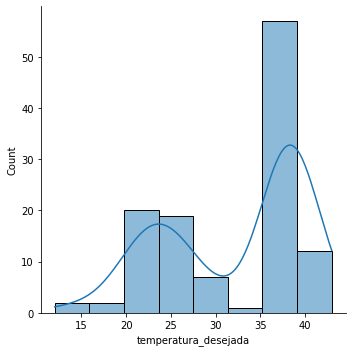

In [16]:
sns.displot(x = df['temperatura_desejada'], kde=True)

**Skewness**

Medida da falta de simetria de uma determinada distribuição probabilística.

* $>0$ - Assimetria Positiva - Cauda direita - valores acima da média mais pesada
* $<0$ - Assimetria Negativa - Cauda esquerda - valores abaixo da média mais pesada
* $0$ - Simetria - Mesmo que uma distribuição Normal

In [17]:
df['temperatura_desejada'].skew()

-0.5713967610645747

In [18]:
sts.mode(df['temperatura_desejada']),  df['temperatura_desejada'].median(), df['temperatura_desejada'].mean()

(39, 37.0, 32.15833333333333)

Gráfico Quantil-Quantil

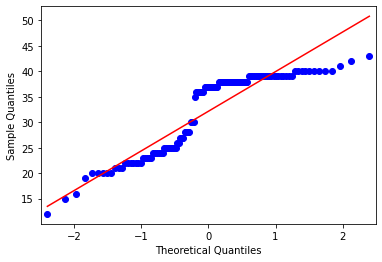

In [19]:
qqplot(df['temperatura_desejada'], line = 's');

In [20]:
testeShapiroWilk(df['temperatura_desejada'])

Distribuição não normal


**Insight:**

- A variável temperatura_desejada tem uma assimetria negativa
- A variável temperatura_desejada não tem uma distribuição não normal
- Mode > Median > Mean

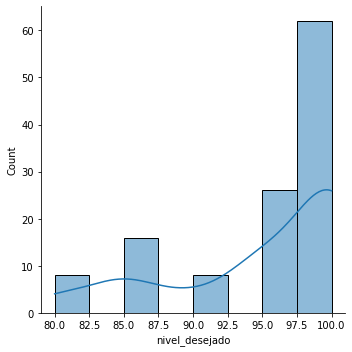

In [21]:
sns.displot(x = df['nivel_desejado'], kde=True)

In [22]:
df['nivel_desejado'].skew() #Assimetria negativa < 0

-1.0497152348523047

In [23]:
sts.mode(df['nivel_desejado']),  df['nivel_desejado'].median(), df['nivel_desejado'].mean()

(100, 100.0, 94.91666666666667)

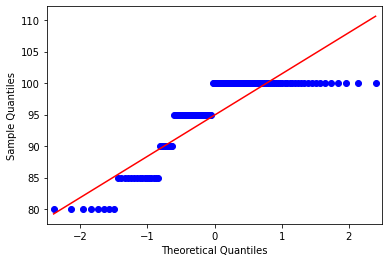

In [24]:
qqplot(df['nivel_desejado'], line = 's');

In [25]:
testeShapiroWilk(df['nivel_desejado'])

Distribuição não normal


**Insight:**

- A variável nivel_desejado tem uma assimetria negativa
- A variável nivel_desejado não tem uma distribuição não normal


In [26]:
order = df['preferencia'].value_counts().index

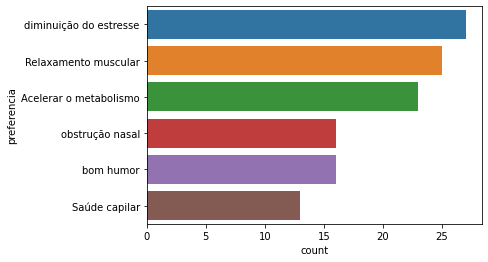

In [27]:
sns.countplot(y ='preferencia', data = df, order = order)

**Insight:**
- A preferência de banho mais utilizada foi diminuição do estresse


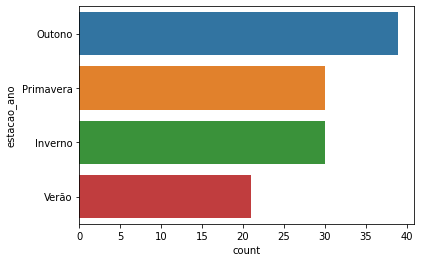

In [28]:
sns.countplot(y ='estacao_ano',
              data = df,
              order = df['estacao_ano'].value_counts().index
             )

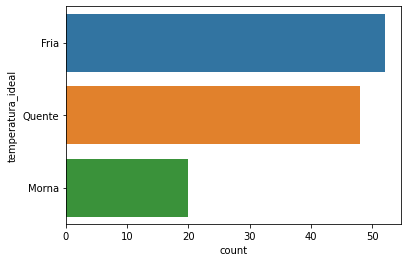

In [29]:
sns.countplot(y ='temperatura_ideal',
              data = df,
              order = df['temperatura_ideal'].value_counts().index
             )

**Insight:**
- Banho com água fria é a mais desejada

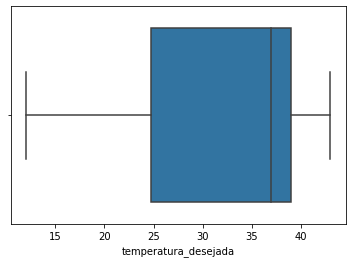

In [30]:
sns.boxplot(x = df['temperatura_desejada'])

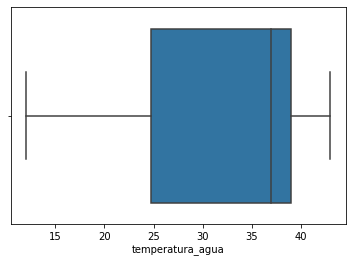

In [31]:
sns.boxplot(x = df['temperatura_agua'])

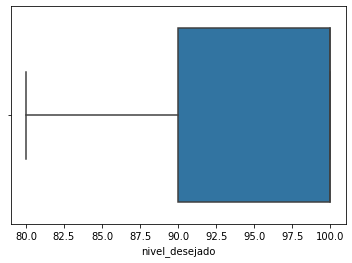

In [32]:
sns.boxplot(x = df['nivel_desejado'])

**Insight:**

Verificando os gráficos de boxplot, podemos dizer que não temos valores outliers

## Bivariate Analysis - análise bivariada

In [33]:
df_2 = df.groupby("temperatura_desejada")[["nivel_desejado"]].aggregate([min,
                                                                        max])
df_2

nivel_desejado     
                                min  max
temperatura_desejada                    
12                              100  100
15                              100  100
16                               95   95
19                               95   95
20                               85  100
21                              100  100
22                               85  100
23                               80  100
24                               80  100
25                               80  100
26                               95  100
27                               90  100
28                               95  100
30                               85  100
35                               90   90
36                               85  100
37                               85  100
38                               85  100
39                               80  100
40                               80  100
41                               90   90
42                               80   80
43                               95   95

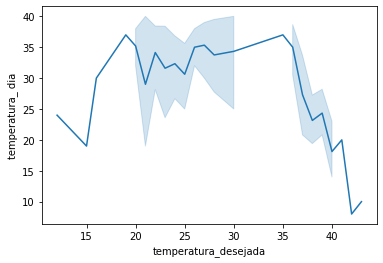

In [34]:
sns.lineplot(x = df['temperatura_desejada'] , y = df['temperatura_ dia'])

**Insight:**
- Podemos ver que nos dias frios é comum que a temperatura escolhida seja quente

**Correlação**


https://medium.com/@ds.m/scatter-plot-6fa3a954975f

https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/main/notebooks/Aula_08_pandas_estatistica.ipynb


Qualquer relação estatística (causal ou não causal) entre duas variáveis. Varia entre $-1$ e $1$:

* $0$ - Nenhuma correlação
* $+1$ - Correlação/Associação positiva perfeita
* $-1$ - Correlação/Associação negativa perfeita


<img src="https://github.com/storopoli/ciencia-de-dados/blob/main/notebooks/images/correlacao.png?raw=1" alt="correlação" style="width: 600px;"/>

* Primeira Fileira: Exemplos de correlações entre $-1$ e $1$
* Segunda Fileira: Correlação não altera a inclinação (*slope*) entre duas variáveis
* Terceira Fileira: Exemplos de relações não-lineares (Correlação é $0$)

In [35]:
#Correlação
df.corr()

,temperatura_desejada,temperatura_agua,temperatura_ dia,nivel_desejado
temperatura_desejada,1.000000,0.999932,-0.419032,0.046808
temperatura_agua,0.999932,1.000000,-0.418493,0.046011
temperatura_ dia,-0.419032,-0.418493,1.000000,-0.038601
nivel_desejado,0.046808,0.046011,-0.038601,1.000000


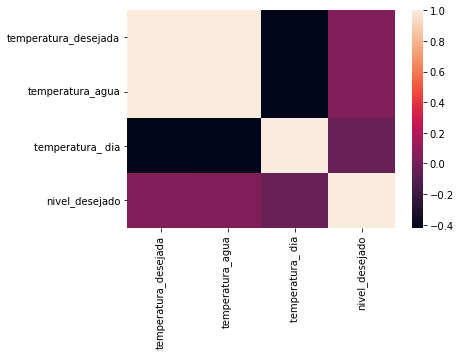

In [36]:
#Correlação
sns.heatmap(df.corr())

**Insight:**
- temperatura_desejada com a temperatura_agua tem uma **correlação positiva perfeita**

- temperatura_ dia com a temperatura_agua tem uma fraca correlação negativa


**Multivariate analysis**

Dispersão 

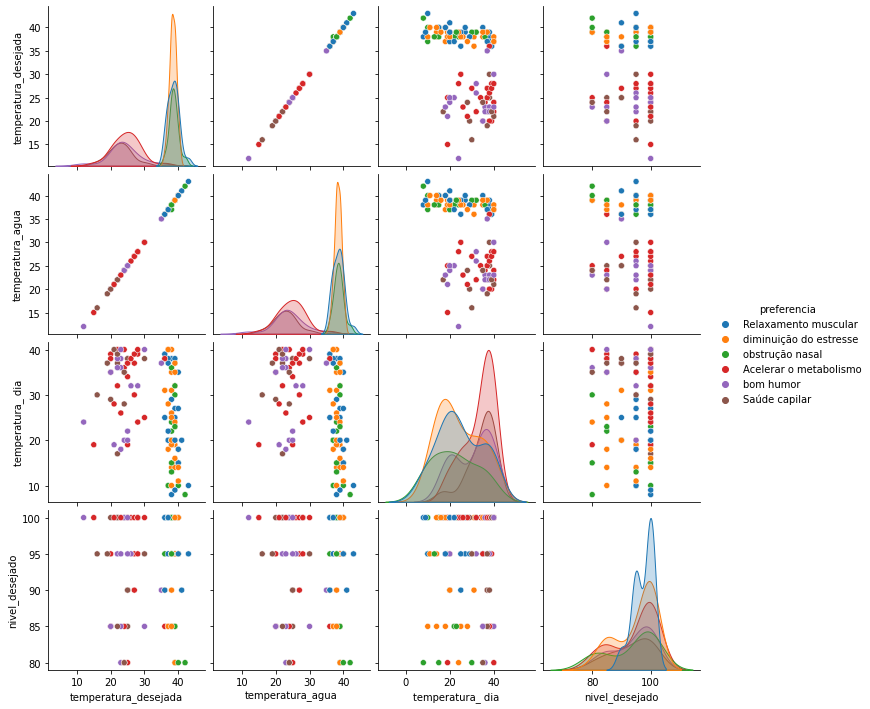

In [37]:
sns.pairplot(df, hue='preferencia')

**Insight:**
- temperatura_desejada com a temperatura_agua tem uma **correlação positiva perfeita**

- temperatura_ dia com a temperatura_agua tem uma fraca correlação negativa


# Data Preparation - Preparação dos Dados


In [38]:
df.head()

,usuario,temperatura_desejada,horario_banho,duracao,banho_finalizado,preferencia,estacao_ano,temperatura_agua,temperatura_ dia,nivel_desejado,temperatura_ideal
0,Samuel,38,11:00,00:40,11:40,Relaxamento muscular,Primavera,38,38,100,Quente
1,Samuel,39,22:00,00:20,22:20,diminuição do estresse,Primavera,39,19,100,Quente
2,Samuel,39,19:00,00:20,19:20,obstrução nasal,Primavera,39,37,100,Quente
3,Samuel,38,10:00,00:30,10:30,diminuição do estresse,Primavera,38,35,100,Quente
4,Samuel,39,08:00,00:24,08:24,Relaxamento muscular,Primavera,39,38,95,Quente


In [39]:
label_encoder = preprocessing.LabelEncoder()

#temperatura_ideal
df['temperatura_ideal'] = label_encoder.fit_transform(df['temperatura_ideal'])

# Convertendo valores inteiros para variaveis dummy
dummy_y = pd.get_dummies(df, columns=["temperatura_ideal"], prefix=["temperatura_ideal"] )

#Pegando apenas os ultimos valores, valores da variavel target
dummy_y = dummy_y.iloc[:,10:13]

In [40]:
dummy_y

,temperatura_ideal_0,temperatura_ideal_1,temperatura_ideal_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
115,0,0,1
116,0,0,1
117,0,0,1
118,0,0,1


In [41]:
df = pd.get_dummies(df, columns=["preferencia"], prefix=["preferencia"] )
df = pd.get_dummies(df, columns=["estacao_ano"], prefix=["estacao_ano"] )

In [42]:
df.head()

,usuario,temperatura_desejada,horario_banho,duracao,banho_finalizado,temperatura_agua,temperatura_ dia,nivel_desejado,temperatura_ideal,preferencia_Acelerar o metabolismo,preferencia_Relaxamento muscular,preferencia_Saúde capilar,preferencia_bom humor,preferencia_diminuição do estresse,preferencia_obstrução nasal,estacao_ano_Inverno,estacao_ano_Outono,estacao_ano_Primavera,estacao_ano_Verão
0,Samuel,38,11:00,00:40,11:40,38,38,100,2,0,1,0,0,0,0,0,0,1,0
1,Samuel,39,22:00,00:20,22:20,39,19,100,2,0,0,0,0,1,0,0,0,1,0
2,Samuel,39,19:00,00:20,19:20,39,37,100,2,0,0,0,0,0,1,0,0,1,0
3,Samuel,38,10:00,00:30,10:30,38,35,100,2,0,0,0,0,1,0,0,0,1,0
4,Samuel,39,08:00,00:24,08:24,39,38,95,2,0,1,0,0,0,0,0,0,1,0


In [43]:
new_df = df[['temperatura_desejada', 'temperatura_agua', 'temperatura_ dia',
       'nivel_desejado',
       'preferencia_Acelerar o metabolismo',
       'preferencia_Relaxamento muscular', 'preferencia_Saúde capilar',
       'preferencia_bom humor', 'preferencia_diminuição do estresse',
       'preferencia_obstrução nasal', 'estacao_ano_Inverno',
       'estacao_ano_Outono', 'estacao_ano_Primavera', 'estacao_ano_Verão']]

In [44]:
new_df.shape

(120, 14)

**Normalização**

In [45]:
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(new_df)

In [46]:
df_norm = pd.DataFrame(X)
df_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.838710,0.838710,0.93750,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.870968,0.870968,0.34375,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.870968,0.870968,0.90625,1.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.838710,0.838710,0.84375,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.870968,0.870968,0.93750,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.903226,0.903226,0.18750,1.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
116,0.806452,0.806452,0.43750,1.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
117,0.838710,0.838710,0.15625,0.75,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
118,0.870968,0.870968,0.25000,1.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [47]:
df_norm.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000
mean,0.650269,0.650000,0.614062,0.745833,0.191667,0.208333,0.108333,0.133333,0.225000,0.133333,0.250000,0.325000,0.250000,0.17500
std,0.252308,0.252122,0.303539,0.328901,0.395263,0.407819,0.312104,0.341360,0.419333,0.341360,0.434828,0.470339,0.434828,0.38156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.411290,0.411290,0.367188,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.806452,0.806452,0.640625,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.870968,0.870968,0.906250,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,1.000000,0.250000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


**Insight:**

- Normalizar tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1.

In [48]:
#Definindo as labels
y = df['temperatura_ideal'].values

In [49]:
#Definindo as labels
dummy_y_values = dummy_y.values

In [50]:
#Separando o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

#Utilizando dummy_y
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, dummy_y_values, test_size=0.30, random_state=123)

# Modeling - Modelagem

## Random Forest

**Argumentos**:
* `n_estimators` - `int` - Número de Árvores da Floresta = 180
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade) = 123 

In [51]:
#Chamando o objeto e definindo alguns parametros
rfc = RandomForestClassifier(n_estimators=180,
                             random_state=123)
#Ajustando o modelo
model_rfc = rfc.fit(X_train, y_train)

#Fazendo a predição, utilizando valores para teste
y_pred_rfc = model_rfc.predict(X_test)

#Accuracy do modelo
accuracy_score(y_test, y_pred_rfc)

0.9722222222222222

## Multi layer Perceptron - MLPClassifier

- 🟡 Input Layer
  - Aqui vamos colocar as 14(X) variáveis de entrada.
- 🔵 Hidden Layer
  - Vamos ter 1 camada oculta com 90 neurônios
- 🟠 Output Layer
  - 3 neurônios de saída

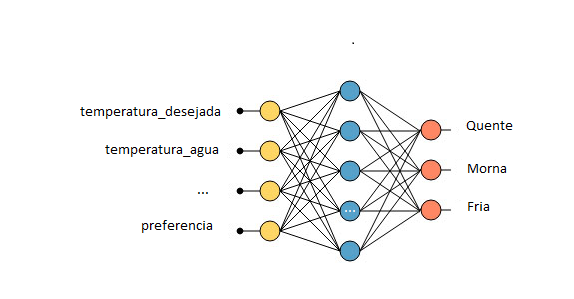

In [52]:
#Chamando o objeto e definindo alguns parametros
#solver='adam'  otimização de peso
clf = MLPClassifier(hidden_layer_sizes= (90,),
                    learning_rate_init=0.01,
                    random_state=123,
                    max_iter=400,
                    solver='adam' 
                    )

#Ajustando o modelo
model_MLP = clf.fit(X_train, y_train)

#Fazendo a predição, utilizando valores para teste
y_pred = model_MLP.predict(X_test)

#Accuracy do modelo
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9444444444444444


## Redes Neurais com Keras

In [53]:
model = Sequential()  # Cria uma rede neural sequencial

model.add(InputLayer(input_shape=(14,))) # input layer
model.add(Dense(90, activation='relu')) # hidden layer 1
model.add(Dropout(0.2)) # dropout layer,  medida de regularização na qual evita-se overfitting
model.add(Dense(3, activation='softmax')) # output layer

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                1350      
                                                                 
 dropout (Dropout)           (None, 90)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 273       
                                                                 
Total params: 1,623
Trainable params: 1,623
Non-trainable params: 0
_________________________________________________________________


**Insight:**

- A rede terá 14 valores de entradas (X) e 3 neurônios de saída(y). Teremos 1 camada oculta com 90 neurônios
- Função de ativação foi utilizada a ReLU
- Output layer com ativação softmax
- Dropout medida de regularização na qual evita-se overfitting, é um algoritmo que especifica que a cada iteração de época do treino os neurônios possuem uma probabilidade de serem removidos (não utilizados) para a aprendizagem

In [54]:
# otimização
model.compile(optimizer= Adam(learning_rate = 0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

**Insight:**

- Para a função de Custo foi escolhido categorical_crossentropy para problemas com MultiClassificação
- ADAM como algoritmo de Otimização
- A métrica escolhida foi acurácia


*Early Stopping* (Parada Precoce)

Usar *Early Stopping* significa que, no final de cada época, devemos calcular o erro da rede. Se ele não diminuir significativamente após $n$ épocas, o treinamento é interrompido e a rede utiliza os parâmetros aprendidos até o ponto de interrupção.

É um `callback` especificado durante o treino

* [`tf.keras.callbacks.EarlyStopping()`](https://keras.io/api/callbacks/early_stopping/)
    * `monitor='val_loss'` - métrica a monitorar
    * `patience=N` - número de épocas a esperar até não conseguir nenhum aprimoramento para interrupção do treinamento

In [55]:
# train (fit)
history = model.fit(x= X_train_2,
                        y= y_train_2, 
                        epochs=200,
                        batch_size=36,
                        verbose=1,
                        validation_data=(X_test_2, y_test_2),
                        callbacks=[tf.keras.callbacks.EarlyStopping(
                         monitor='val_loss',
                         patience=5)])

Epoch 1/200
3/3 [==============================] - 2s 249ms/step - loss: 0.9763 - accuracy: 0.5238 - val_loss: 0.7811 - val_accuracy: 0.6667
Epoch 2/200
3/3 [==============================] - 0s 21ms/step - loss: 0.6522 - accuracy: 0.7738 - val_loss: 0.5697 - val_accuracy: 0.8056
Epoch 3/200
3/3 [==============================] - 0s 21ms/step - loss: 0.4470 - accuracy: 0.8452 - val_loss: 0.3993 - val_accuracy: 0.8611
Epoch 4/200
3/3 [==============================] - 0s 46ms/step - loss: 0.3070 - accuracy: 0.9405 - val_loss: 0.3050 - val_accuracy: 0.9444
Epoch 5/200
3/3 [==============================] - 0s 48ms/step - loss: 0.2163 - accuracy: 0.9524 - val_loss: 0.2650 - val_accuracy: 0.9167
Epoch 6/200
3/3 [==============================] - 0s 54ms/step - loss: 0.1701 - accuracy: 0.9643 - val_loss: 0.2348 - val_accuracy: 0.8889
Epoch 7/200
3/3 [==============================] - 0s 49ms/step - loss: 0.1493 - accuracy: 0.9762 - val_loss: 0.1997 - val_accuracy: 0.9167
Epoch 8/200
3/3 [==

# Evaluation - Avaliação do Modelo

## Random Forest

**Plotando a Árvore**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

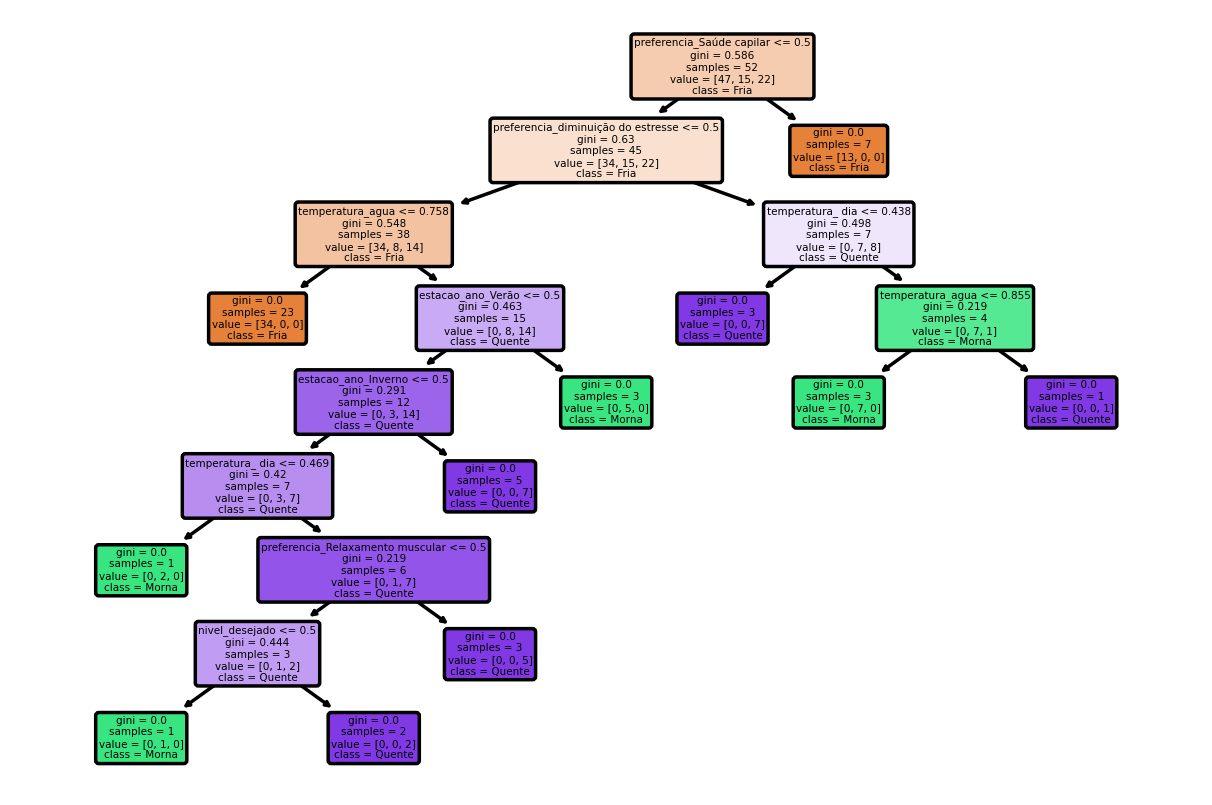

In [56]:
mpl.rcParams['figure.dpi'] = 250

plt.figure()
plot_tree(model_rfc.estimators_[179],
          feature_names = list(new_df.columns),
          class_names = ['Fria', 'Morna', 'Quente'],
          filled = True,
          rounded = True)
plt.show()

In [57]:
#Classification_report mostra as principais metricas para o modelo
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      1.00      0.91         5
           2       1.00      0.95      0.97        20

    accuracy                           0.97        36
   macro avg       0.94      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



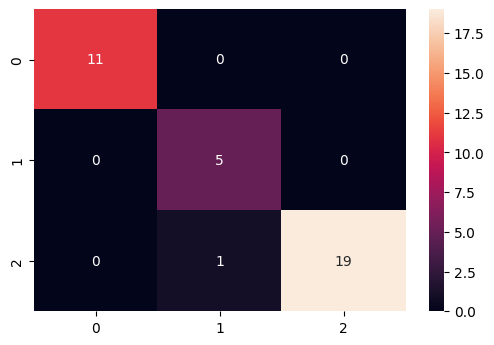

In [58]:
#Matrix de confusão 
mpl.rcParams['figure.dpi'] = 100
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True)

## Multi layer Perceptron - MLPClassifier

In [60]:
#Classification_report mostra as principais metricas para o modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.71      1.00      0.83         5
           2       1.00      0.90      0.95        20

    accuracy                           0.94        36
   macro avg       0.90      0.97      0.93        36
weighted avg       0.96      0.94      0.95        36



In [74]:
label_encoder.classes_

array(['Fria', 'Morna', 'Quente'], dtype=object)

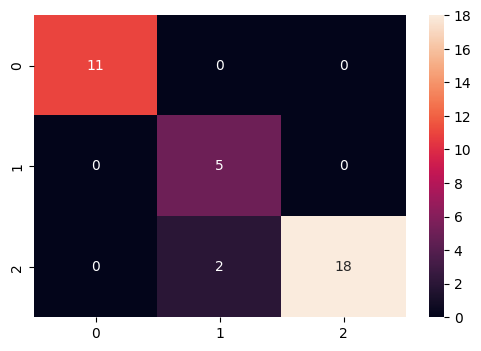

In [61]:
#Matrix de confusão
mpl.rcParams['figure.dpi'] = 100 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

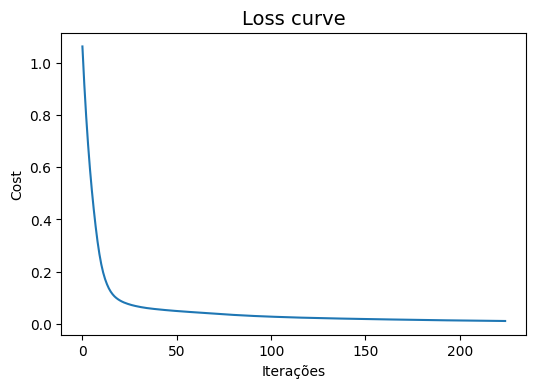

In [62]:
plt.plot(model_MLP.loss_curve_)
plt.title("Loss curve", fontsize=14)
plt.xlabel('Iterações')
plt.ylabel('Cost')
plt.show()

## Redes Neurais com Keras

In [63]:
model.evaluate(X_test_2, y_test_2)

2/2 [==============================] - 0s 7ms/step - loss: 0.2187 - accuracy: 0.9167


[0.2186594307422638, 0.9166666865348816]

In [64]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


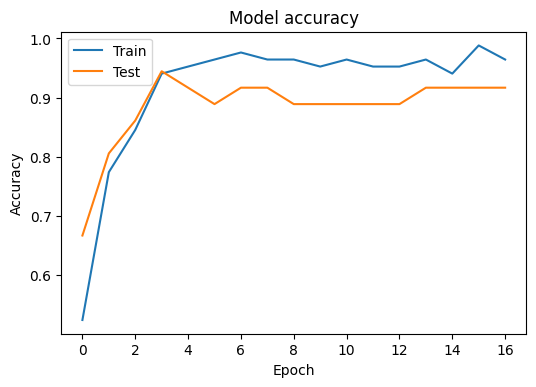

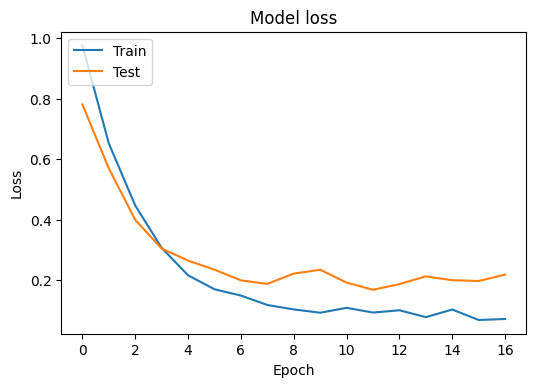

In [65]:
# Plot acurácia de treino e validação
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot custo de treino e validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [66]:
y_pred = model.predict(X_test_2) 
y_pred = np.argmax(y_pred, axis=1)
yTest = np.argmax(y_test_2, axis=1)
cm = confusion_matrix(yTest, y_pred)
print(cm)

2/2 [==============================] - 0s 4ms/step
[[11  0  0]
 [ 0  5  0]
 [ 0  3 17]]


In [ ]:
#array(['Fria', 'Morna', 'Quente'], dtype=object)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        11
           1     0.6250    1.0000    0.7692         5
           2     1.0000    0.8500    0.9189        20

    accuracy                         0.9167        36
   macro avg     0.8750    0.9500    0.8960        36
weighted avg     0.9479    0.9167    0.9229        36



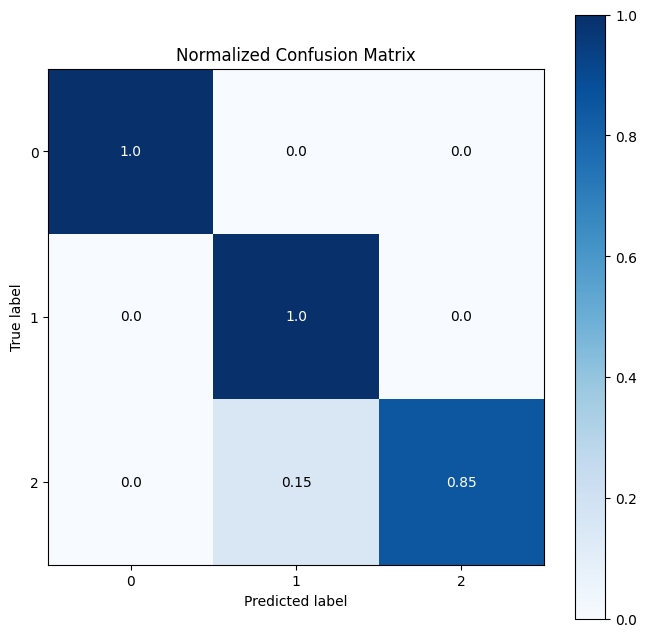

In [67]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(yTest, y_pred, normalize=True, figsize=(8, 8))

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(yTest, y_pred, digits=4))

## Predict

In [84]:
valores = [[0.4, 0.4, 0.5 , 1., #'temperatura_desejada', 'temperatura_agua', 'temperatura_ dia', 'nivel_desejado',
            0., 0., 1., 0., 0., 0., #'pref_Acelerar o metabolismo', 'pref_Relaxamento muscular', 'pref_Saúde capilar', 'pref_bom humor', 'pref_diminuição do estresse', 'pref_obstrução nasal',
            0., 0., 0., 1.]] #'estacao_ano_Inverno', 'estacao_ano_Outono', 'estacao_ano_Primavera', 'estacao_ano_Verão'

**Predict com MLPClassifier**

In [85]:
v_pred = model_MLP.predict(valores)

In [86]:
label_encoder.inverse_transform(v_pred)

array(['Fria'], dtype=object)

**Redes Neurais com Keras Predict**

In [87]:
predict_keras = np.argmax(model.predict(valores), axis=-1)
predict_keras

1/1 [==============================] - 0s 62ms/step


array([0])

In [88]:
label_encoder.inverse_transform(predict_keras)

array(['Fria'], dtype=object)

**Insight:**
- Foi escolhido a opção de **Saúde capilar**, e os algoritmos indicaram corretamente um banho de água **fria**


# Deployment